In [ ]:
import numpy as np
import random
from tensorflow.keras.datasets import mnist

# Load MNIST data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize and reshape data
x_train = [x.reshape(784, 1) / 255.0 for x in x_train]
x_test = [x.reshape(784, 1) / 255.0 for x in x_test]

# One-hot encode labels
def one_hot_encode(y, num_classes=10):
    one_hot = np.zeros((len(y), num_classes))
    for i, val in enumerate(y):
        one_hot[i, val] = 1.0
    return [y.reshape(num_classes, 1) for y in one_hot]

y_train = one_hot_encode(y_train)
y_test = one_hot_encode(y_test)

# Combine data into tuples
training_data = list(zip(x_train, y_train))
test_data = list(zip(x_test, y_test))

# Define our neural network
class Network:
    def __init__(self, sizes):
        """Initialize the network with random weights and biases."""
        self.num_layers = len(sizes)
        self.sizes = sizes
        self.biases = [np.random.randn(y, 1) for y in sizes[1:]]
        self.weights = [np.random.randn(y, x) for x, y in zip(sizes[:-1], sizes[1:])]

    def feedforward(self, a):
        """Compute the output of the network for an input 'a'."""
        for b, w in zip(self.biases, self.weights):
            a = sigmoid(np.dot(w, a) + b)
        return a

    def SGD(self, training_data, epochs, mini_batch_size, eta, test_data=None):
        """Train the network using mini-batch stochastic gradient descent."""
        if test_data:
            n_test = len(test_data)
        n = len(training_data)
        for j in range(epochs):
            random.shuffle(training_data)
            mini_batches = [
                training_data[k:k + mini_batch_size]
                for k in range(0, n, mini_batch_size)]
            for mini_batch in mini_batches:
                self.update_mini_batch(mini_batch, eta)
            if test_data:
                print(f"Epoch {j}: {self.evaluate(test_data)} / {n_test}")
            else:
                print(f"Epoch {j} complete")

    def update_mini_batch(self, mini_batch, eta):
        """Update weights and biases using backpropagation for a mini-batch."""
        nabla_b = [np.zeros(b.shape) for b in self.biases]
        nabla_w = [np.zeros(w.shape) for w in self.weights]
        for x, y in mini_batch:
            delta_nabla_b, delta_nabla_w = self.backprop(x, y)
            nabla_b = [nb + dnb for nb, dnb in zip(nabla_b, delta_nabla_b)]
            nabla_w = [nw + dnw for nw, dnw in zip(nabla_w, delta_nabla_w)]
        self.weights = [w - (eta / len(mini_batch)) * nw for w, nw in zip(self.weights, nabla_w)]
        self.biases = [b - (eta / len(mini_batch)) * nb for b, nb in zip(self.biases, nabla_b)]

    def backprop(self, x, y):
        """Perform backpropagation to compute gradients."""
        nabla_b = [np.zeros(b.shape) for b in self.biases]
        nabla_w = [np.zeros(w.shape) for w in self.weights]
        # Feedforward
        activation = x
        activations = [x]
        zs = []
        for b, w in zip(self.biases, self.weights):
            z = np.dot(w, activation) + b
            zs.append(z)
            activation = sigmoid(z)
            activations.append(activation)
        # Backward pass
        delta = self.cost_derivative(activations[-1], y) * sigmoid_prime(zs[-1])
        nabla_b[-1] = delta
        nabla_w[-1] = np.dot(delta, activations[-2].transpose())
        for l in range(2, self.num_layers):
            z = zs[-l]
            sp = sigmoid_prime(z)
            delta = np.dot(self.weights[-l + 1].transpose(), delta) * sp
            nabla_b[-l] = delta
            nabla_w[-l] = np.dot(delta, activations[-l - 1].transpose())
        return (nabla_b, nabla_w)

    def evaluate(self, test_data):
        """Evaluate the network's accuracy on the test dataset."""
        test_results = [(np.argmax(self.feedforward(x)), np.argmax(y)) for (x, y) in test_data]
        return sum(int(x == y) for (x, y) in test_results)

    def cost_derivative(self, output_activations, y):
        """Return the vector of partial derivatives of the cost function."""
        return (output_activations - y)

# Define utility functions
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

def sigmoid_prime(z):
    return sigmoid(z) * (1 - sigmoid(z))

# Initialize and train our network
net = Network([784, 30, 10])  #784 input neurons, one hidden layer of 30 neurons, 10 output neurons
net.SGD(training_data, epochs=30, mini_batch_size=10, eta=3.0, test_data=test_data)


Epoch 0: 8226 / 10000
Epoch 1: 9298 / 10000
Epoch 2: 9335 / 10000
Epoch 3: 9351 / 10000
Epoch 4: 9432 / 10000
Epoch 5: 9427 / 10000
Epoch 6: 9430 / 10000
Epoch 7: 9457 / 10000
Epoch 8: 9491 / 10000
Epoch 9: 9471 / 10000
Epoch 10: 9477 / 10000
Epoch 11: 9415 / 10000
Epoch 12: 9507 / 10000
Epoch 13: 9477 / 10000
Epoch 14: 9485 / 10000
Epoch 15: 9491 / 10000
Epoch 16: 9489 / 10000
Epoch 17: 9505 / 10000
Epoch 18: 9506 / 10000
Epoch 19: 9475 / 10000
Epoch 20: 9511 / 10000
Epoch 21: 9504 / 10000
Epoch 22: 9495 / 10000
Epoch 23: 9501 / 10000
Epoch 24: 9536 / 10000
Epoch 25: 9527 / 10000
Epoch 26: 9469 / 10000
Epoch 27: 9508 / 10000
Epoch 28: 9540 / 10000
Epoch 29: 9540 / 10000


In [ ]:
# Print weights and biases for each layer
for i, (w, b) in enumerate(zip(net.weights, net.biases)):
    print(f"Layer {i+1} -> Layer {i+2}")
    print(f"Weights (shape {w.shape}):")
    print(w)
    print(f"Biases (shape {b.shape}):")
    print(b)
    print("="*50)

Layer 1 -> Layer 2
Weights (shape (30, 784)):
[[-0.09825156  0.47068916  1.94762133 ... -1.62370162 -0.31262313
   1.89431592]
 [ 0.30113593  1.95190864 -0.90573743 ... -1.53812329  1.65147376
   0.98773584]
 [ 1.31615861  0.47826579  0.42932276 ... -0.65260821 -0.83651915
  -1.55132382]
 ...
 [ 0.33657879  1.44069997 -1.41001361 ... -0.35594559  0.07134237
  -1.0853868 ]
 [ 1.22511771  0.68139391 -0.78518471 ...  0.30329859  0.46186731
  -1.23875422]
 [ 0.99518676 -0.69804559  0.00606163 ...  1.1557911   0.47786892
   0.61173431]]
Biases (shape (30, 1)):
[[ 1.10346125]
 [ 5.08419993]
 [ 0.67153573]
 [-2.39701671]
 [ 0.47024044]
 [ 0.58440086]
 [ 0.5234122 ]
 [ 2.1328727 ]
 [-4.59071042]
 [ 2.30388968]
 [-1.78335381]
 [-3.87269771]
 [-2.52727132]
 [-2.29117243]
 [ 1.28631253]
 [-5.05121077]
 [ 0.357949  ]
 [-1.02254824]
 [ 0.7211269 ]
 [ 0.92315283]
 [ 0.60492518]
 [-2.73929928]
 [ 0.06158562]
 [ 2.43023098]
 [-2.33746239]
 [ 1.50327825]
 [-2.27499751]
 [-1.21460518]
 [-0.97583173]
 [ 

In [ ]:
from google.colab import files
files.upload()
image_path = 'homework_image.jpg'

Saving homework_image.jpg to homework_image (2).jpg


In [ ]:
from PIL import Image
import numpy as np

def preprocess_image(image_path):
    """Preprocess a .jpg image to be compatible with the neural network."""
    # Load image
    img = Image.open(image_path).convert('L')  # Convert to grayscale

    # Resize image to 28x28 pixels
    img = img.resize((28, 28))

    # Normalize pixel values to [0, 1]
    img_array = np.array(img) / 255.0

    # Reshape to match network input shape (784, 1)
    img_array = img_array.reshape(784, 1)

    return img_array

def predict_image(network, image_path):
    """Use the network to predict the digit in a single image."""
    # Preprocess the image
    img_array = preprocess_image(image_path)

    # Get network output
    output = network.feedforward(img_array)

    # Find the predicted digit
    predicted_label = np.argmax(output)

    return predicted_label


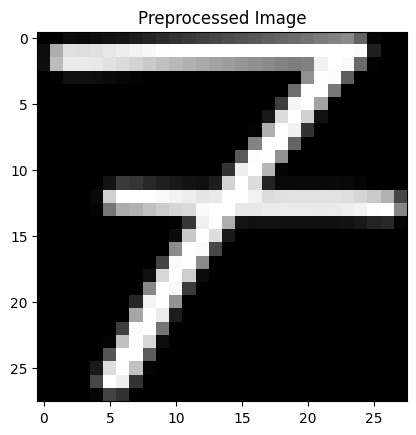

In [ ]:
#This is the input image of the neural network
import matplotlib.pyplot as plt

img_array = preprocess_image(image_path)
plt.imshow(img_array.reshape(28, 28), cmap='gray')
plt.title("Preprocessed Image")
plt.show()

In [ ]:
predicted_label = predict_image(net, image_path)
print(f"The predicted digit is: {predicted_label}")

The predicted digit is: 8


In [ ]:
#This is the raw output of the neural network

def predict_image_with_outputs(network, image_path):
    """Use the network to predict the digit in a single image and print raw outputs."""
    # Preprocess the image
    img_array = preprocess_image(image_path)

    # Get network output
    output = network.feedforward(img_array)

    # Print raw output values
    print("Raw outputs for the 10 neurons:")
    print(output)

    # Find the predicted digit
    predicted_label = np.argmax(output)

    return predicted_label, output


In [ ]:
predicted_label, raw_outputs = predict_image_with_outputs(net, image_path)
print(f"Predicted digit: {predicted_label}")

Raw outputs for the 10 neurons:
[[3.79270400e-06]
 [1.98343284e-06]
 [5.57934606e-13]
 [1.92824442e-12]
 [6.74139385e-05]
 [5.11820109e-10]
 [6.92479083e-02]
 [5.36154568e-07]
 [4.64588028e-01]
 [3.08419955e-03]]
Predicted digit: 8


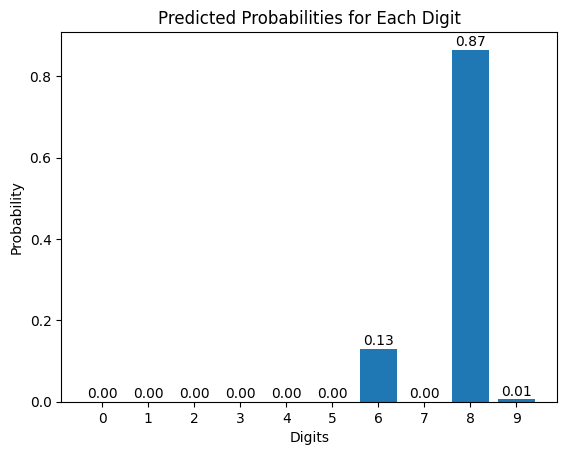

Predicted probabilities for each digit:
Digit 0: 0.0000
Digit 1: 0.0000
Digit 2: 0.0000
Digit 3: 0.0000
Digit 4: 0.0001
Digit 5: 0.0000
Digit 6: 0.1290
Digit 7: 0.0000
Digit 8: 0.8652
Digit 9: 0.0057


In [ ]:
#Probability visualization based off normalization of raw output
import matplotlib.pyplot as plt

def predict_probabilities(network, image_path):
    """Use the network to predict probabilities for all digits in a single image."""
    # Preprocess the image
    img_array = preprocess_image(image_path)

    # Get network output (probabilities)
    output = network.feedforward(img_array)

    # Convert output to probabilities
    probabilities = output / np.sum(output)  # Normalize to make it sum to 1

    return probabilities

def plot_probabilities_with_values(probabilities):
    """Plot the probabilities for each digit and display the values."""
    digits = range(10)  # Digits from 0 to 9
    probabilities = probabilities.flatten()

    # Create bar plot
    plt.bar(digits, probabilities, tick_label=digits)
    plt.xlabel("Digits")
    plt.ylabel("Probability")
    plt.title("Predicted Probabilities for Each Digit")

    # Annotate the probabilities on the bars
    for i, prob in enumerate(probabilities):
        plt.text(i, prob + 0.01, f"{prob:.2f}", ha='center', fontsize=10)

    plt.show()

    # Display probabilities in the console
    print("Predicted probabilities for each digit:")
    for digit, prob in zip(digits, probabilities):
        print(f"Digit {digit}: {prob:.4f}")

# Example usage
probabilities = predict_probabilities(net, image_path)
plot_probabilities_with_values(probabilities)
